In [1]:
import numpy as np
import matplotlib.pyplot as plt

x = np.random.uniform(-3, 3, size=100)
X = x.reshape(-1, 1)
y = 0.5 * x ** 2 + x * 2 + np.random.normal(0, 1, size=100)

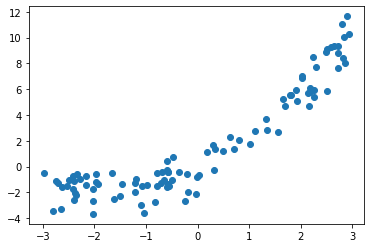

In [2]:
plt.scatter(x, y)
# plt.plot(x, y_predict, color='red')
plt.show()

# 学习曲线

In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=666)

In [4]:
X_train.shape

(75, 1)

In [26]:
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression

def plot_learning_curve(lin_reg, X_train, y_train, X_test, y_test):
    train_score = []
    test_score = []
 
    for i in range(1, X_train.shape[0]+1):

        lin_reg.fit(X_train[:i], y_train[:i])
        y_train_predict = lin_reg.predict(X_train[:i])
        train_score.append(mean_squared_error(y_train[:i], y_train_predict))

        y_test_predict = lin_reg.predict(X_test)
        test_score.append(mean_squared_error(y_test, y_test_predict))
        
    plt.plot([i for i in range(1, X_train.shape[0]+1)], np.sqrt(train_score), label="train")
    plt.plot([i for i in range(1, X_train.shape[0]+1)], np.sqrt(test_score), label="test")
    plt.legend()
    plt.axis([1, 76, 0.0, 4.0])
    plt.show()


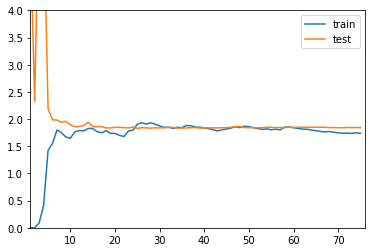

In [27]:
# 欠拟合
plot_learning_curve(LinearRegression(), X_train, y_train, X_test, y_test)

In [28]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
def PolynomialRegression(degree):
    return Pipeline([
        ("poly", PolynomialFeatures(degree=degree)),
        ("std_scaler", StandardScaler()),
        ("lin_reg", LinearRegression())
    ])

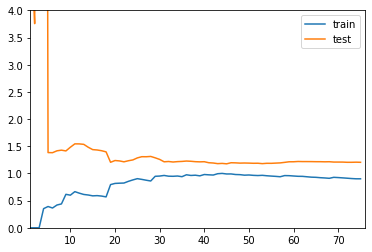

In [29]:
poly2_reg = PolynomialRegression(degree=2)
plot_learning_curve(poly2_reg, X_train, y_train, X_test, y_test)

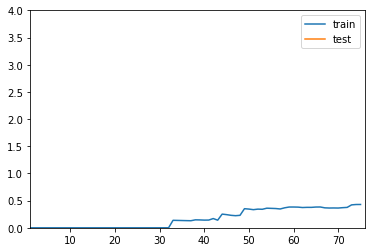

In [30]:
# 过拟合
poly100_reg = PolynomialRegression(degree=100)
plot_learning_curve(poly20_reg, X_train, y_train, X_test, y_test)